# **Analysis of Apple Stock (AAPL)**

**Objective:** Analyze historical stock data, calculate daily and cumulative returns, and study rolling statistics (mean & volatility) to understand trends and risk.

## A. Downloading Data
We use yfinance to fetch Apple (AAPL) stock data from 2020-01-01 to 2025-01-01.


In [26]:
import yfinance as yf
data = yf.download("AAPL", start="2020-01-01", end="2025-01-01",auto_adjust=True)
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538506,72.598884,71.292296,71.545882,135480400
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800
2020-01-06,72.405693,72.444336,70.703027,70.954203,118387200
2020-01-07,72.065163,72.671356,71.845385,72.415353,108872000
2020-01-08,73.224419,73.526310,71.768094,71.768094,132079200


## B. Basic Calculations

### Daily Returns
*Daily return measures the percentage change in stock price from one day to the next.*

The formula for daily return $R_t$ is:

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

where $P_t$ is the price at day $(t)$ and $P_{t-1}$ is the price at day $(t-1)$.


In [27]:
data["Daily Return"] = data["Close"].pct_change()
print(data['Daily Return'])

Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
                ...   
2024-12-24    0.011478
2024-12-26    0.003176
2024-12-27   -0.013242
2024-12-30   -0.013263
2024-12-31   -0.007058
Name: Daily Return, Length: 1258, dtype: float64


Notice that the first value is NaN because there is no previous price to compare with.


### Cumulative Return

*Cumulative return measures the total return of an investment over multiple periods, taking all periodic returns into account.* 

*In others words, it shows growth of $1 invested over the period.*

If we have daily returns $(R_1, R_2, \dots, R_n)$, the cumulative return $(CR_n)$ is:

$$
CR_n = (1 + R_1) \times (1 + R_2) \times \dots \times (1 + R_n) - 1
$$

Where $R_i$, is the return of the investment in period $i$,

For $i=1,2,\dots,n$.


In [28]:
data["Cumulative Return"] = (1 + data["Daily Return"]).cumprod() -1 
print(data["Cumulative Return"])

Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06   -0.001831
2020-01-07   -0.006525
2020-01-08    0.009456
                ...   
2024-12-24    2.546898
2024-12-26    2.558162
2024-12-27    2.511044
2024-12-30    2.464476
2024-12-31    2.440024
Name: Cumulative Return, Length: 1258, dtype: float64


Notice that the first value is NaN, because it becomes 0 (representing 0% return at the start). 

### Rolling Mean (Moving Average) 
*The rolling mean, smooths a time series by averaging values over a fixed window of size $k$.*

For a series of values $(X_1, X_2, \dots, X_n)$, the rolling mean at time $t$ with window size $k$ is:

$$
\text{RollingMean}_t = \frac{1}{k} \sum_{i=t-k+1}^{t} X_i
$$

where:
- $X_i$ = value of the series at time $i$  
- $k$ = window size  
- $(\text{RollingMean}_t)$ = average of the last $k$ values up to time $t$


In [29]:
data["Rolling Mean (20)"] = data["Close"].rolling(window=20,min_periods=1).mean()
print(data["Rolling Mean (20)"])

Date
2020-01-02     72.538506
2020-01-03     72.185898
2020-01-06     72.259163
2020-01-07     72.210663
2020-01-08     72.413414
                 ...    
2024-12-24    245.422270
2024-12-26    246.616031
2024-12-27    247.645377
2024-12-30    248.386246
2024-12-31    248.925831
Name: Rolling Mean (20), Length: 1258, dtype: float64


This calculates the Rolling Mean on a given window k=20.

A window of 20 is commonly used because there are typically **20 trading days in a month** (weekends and market holidays are excluded).

The Rolling mean smooths the daily price fluctuations, making it easier to observe the overall trend of the stock. In other words, it smooths out the small, often random daily changes in the data, allowing us to focus on the overall trend.

The argument `min_periods=1` is used so that the rolling calculation produces a value even for the first 20 data points, instead of returning `NaN`.

### Rolling Volatility (Moving Standard Deviation)

*Rolling volatility measures the variability of a time series over a fixed window. It is often used to assess the **risk or variability** of an investment over time.*

For a series of returns $(R_1, R_2, \dots, R_n)$, the rolling volatility at time $t$ with window size $k$ is:

$$
\text{RollingVolatility}_t = \sqrt{\frac{1}{k} \sum_{i=t-k+1}^{t} \left(R_i - \bar{R}_t\right)^2 }
$$

where:
- $R_i$ = return at time $i$  
- $k$ = window size  
- $\bar{R}_t$ = mean of the returns in the window  
- $\text{RollingVolatility}_t$ = standard deviation of returns in the window at time $t$

In [30]:
data["Rolling Volatility (20)"] = data["Daily Return"].rolling(window=20,min_periods=1).std().fillna(0)
print(data["Rolling Volatility (20)"])

Date
2020-01-02    0.000000
2020-01-03    0.000000
2020-01-06    0.012509
2020-01-07    0.009117
2020-01-08    0.011772
                ...   
2024-12-24    0.008828
2024-12-26    0.008782
2024-12-27    0.009615
2024-12-30    0.010262
2024-12-31    0.010385
Name: Rolling Volatility (20), Length: 1258, dtype: float64


This calculates the Rolling volatility of returns on a given window $k = 20$.

The Rolling volatility measures the variability of returns over the window, helping to assess the **risk or variability** of the stock. Higher values indicate more volatile periods, while lower values indicate more stable periods.

Also in this case, the argument `min_periods=1` is used so that the rolling calculation produces a value even for the first 20 data points, instead of returning `NaN`.

Even with `min_periods=1`, the first few rows may still be NaN. This happens because the **standard deviation is undefined for a single observation**. To handle this, we use `.fillna(0)` to replace these NaN values, ensuring the series does not contain missing data.

### C. Visualization - Plots

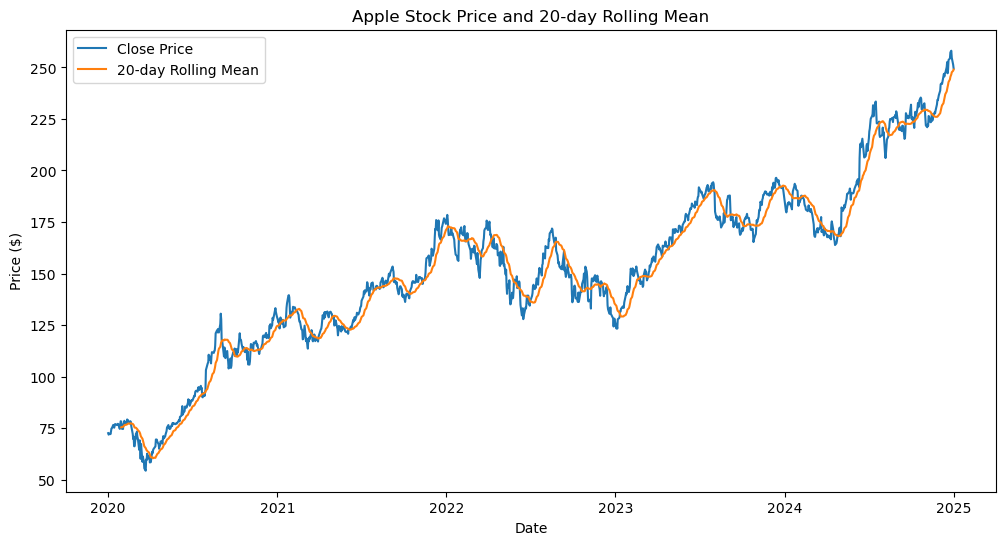

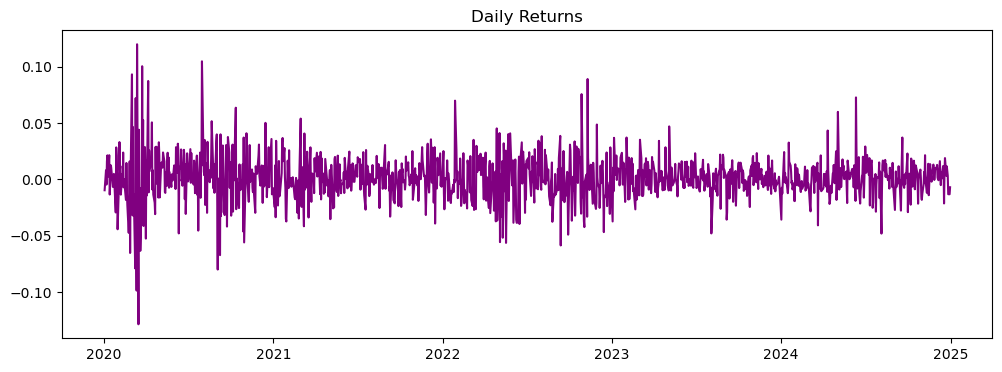

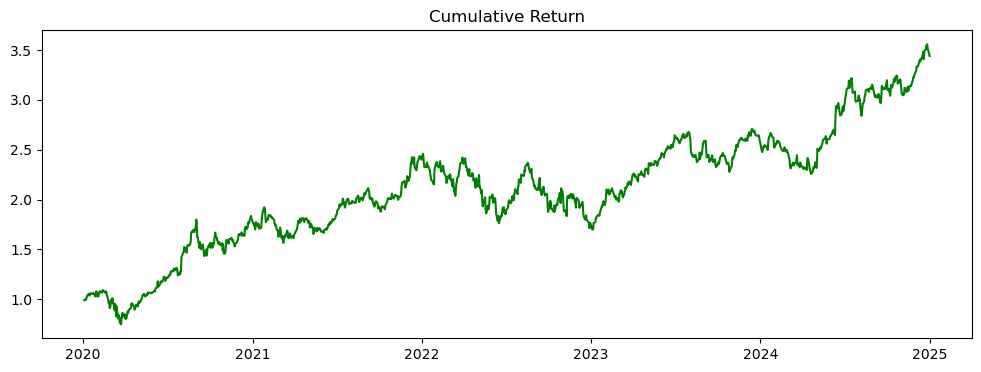

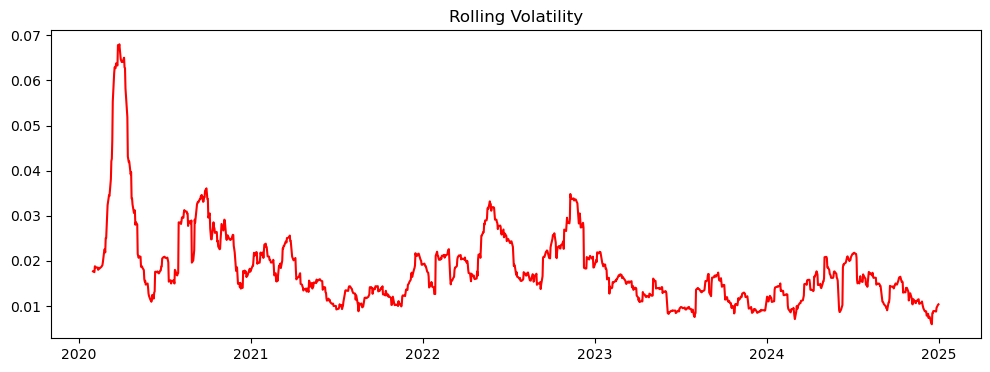

In [31]:
import matplotlib.pyplot as plt

# Price and Rolling Mean
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Close'].rolling(20).mean(), label='20-day Rolling Mean')
plt.title('Apple Stock Price and 20-day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Daily Returns
plt.figure(figsize=(12,4))
plt.plot(data['Daily Return'], label='Daily Return', color='purple')
plt.title('Daily Returns')
plt.show()

# Cumulative Return
plt.figure(figsize=(12,4))
plt.plot((1 + data['Daily Return']).cumprod(), label='Cumulative Return', color='green')
plt.title('Cumulative Return')
plt.show()

# Rolling Volatility
plt.figure(figsize=(12,4))
plt.plot(data['Daily Return'].rolling(20).std(), label='Rolling Volatility (20 days)', color='red')
plt.title('Rolling Volatility')
plt.show()


### E. Summary Table

In [32]:
import pandas as pd
summary = pd.DataFrame({
    "Mean Daily Return": [data['Daily Return'].mean()],
    "Std Daily Return": [data['Daily Return'].std()],
    "Total Return": [(1 + data['Daily Return']).prod() - 1]
})
summary


,Mean Daily Return,Std Daily Return,Total Return
0,0.001182,0.019956,2.440024


### G. Insights

First, let’s begin with the general insights, and then we’ll move on to analyze the more detailed numerical results from the `summary` table we created earlier. 

##### Key Insights from the plots: 

- Daily returns fluctuate around 0, indicating that on most days the stock doesn’t move drastically. Also, we observe several volatility spikes during certain periods, indicating days of strong market reactions or major company announcements. Compared to 2020–2022 (COVID-19, energy crises and more), the 2025 period appears relatively stable, with fewer sharp daily fluctuations.
- The cumulative return shows overall growth of the investment over 5 years.
- The 20-day Rolling mean smooths out short-term fluctuations, showing the general trend.
- Rolling volatility identifies periods of increased risk, during which the market typically demands higher risk premiums and there is greater uncertainty in investor sentiment. During 2020–2021, we observe significantly higher volatility, as the market during the COVID-19 period was characterized by uncertainty rather than just increased risk.

##### Insights from summmary plot:

- Mean Daily Return: This represents the average daily return over the analyzed period. It equals 0.001182, indicating that the stock gained approximately 0.1182% per day on average.
- Std Daily Return: The standard deviation of daily returns, indicates how volatile the stock is day-to-day. It equals 0.019956, therefore Daily returns typically vary by ±1.9956% around the mean.
- Total Return: The overall return over the entire period. It equals 2.440023, indicating that the investment grew by **244.0%** over the whole period. In others words, over the whole period, ${$1}$ invested would have grown to about ${$3.44} $(+$2,44).